<a href="https://colab.research.google.com/github/imnadiarasheed/DIP/blob/main/Assign_2(RG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import cv2 as cv
import math as m
import matplotlib.pyplot as plt

In [17]:
# yourimage     givenImage      label       number
# 0             0               TN          2*0 + 0 = 0
# 0             1               FN          2*0 + 1 = 1
# 1             0               FP          2*1 + 0 = 2
# 1             1               TP          2*1 + 1 = 3
# where 0 is background 1 is foreground

# yourimage     givenImage      label       number
# 255           255             TN          2*255 + 255 = 765 = 253 + 3 = 0 *63 = 0(as ans will not exceed 255)
# 255           0               FN          2*255 + 0 = 510 = 254 + 3 = 1 *63 = 63
# 0             255             FP          2*0 + 255 = 255 = 255 + 3 = 2 *63 = 126
# 0             0               TP          2*0 + 0 = 0 = 0 + 3 = 3 *63 = 189
# where 255 is background 0 is foreground
def performancePrams(yourImage, givenImage):
    output = (((yourImage * 2) + givenImage) + 3)*63
    unique_elements, counts = np.unique(output, return_counts=True)
    #rint(unique_elements, counts)
    TN, FN, FP, TP = counts
    ACC = (TP + TN)/ (TP + TN + FP + FN)
    TPR = TP / (TP + FN)
    FPR = FP / (TN + FP)
    diceCoff = 2*TP / (FN + (2*TP) + FP)
    print([ACC, TPR, FPR, diceCoff])

    labelled_image = np.zeros((output.shape[0], output.shape[1],3), dtype=int)
    for x in range(0, output.shape[0]):
      for y in range(0, output.shape[1]):
        if (output[x,y] == unique_elements[0]):
          labelled_image[x,y] = (0,0,0)
        elif (output[x,y] == unique_elements[1]):
          labelled_image[x,y] = (0,255,0)
        elif (output[x,y] == unique_elements[2]):
          labelled_image[x,y] = (255,0,0)
        elif (output[x,y] == unique_elements[3]):
          labelled_image[x,y] = (255,255,255)
    return labelled_image

[0.8613829787234043, 0.29832092238028557, 0.10847940128426319, 0.1794387373558468]


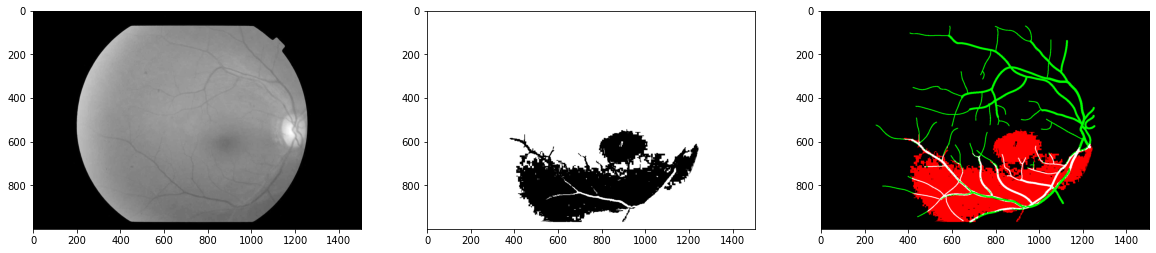

In [22]:
# Region Growing
img = cv.imread('drive/MyDrive/images/assign-2/IM000023.JPG', 0)

def my_region_grow():
    size = np.shape(img)
    M = np.zeros(size, dtype=np.uint8)
    thresh = 8

    p = 810
    q = 700

    seed = []
    seed.append(p)
    seed.append(q)

    my_region = np.zeros(size, dtype=np.uint8)
    my_region[p][q] = 255
    M[p][q] = 1
    check_list = [seed]

    def check_neighbours(x, y):
        for i in range(-1, 2):
            for j in range(-1, 2):
                if x + i < size[0] and y + j < size[1]:
                    if M[x + i][y + j] != 1:
                        if abs(int(img[x + i][y + j]) - int(img[p][q])) <= thresh:
                            z = [x + i, y + j]
                            my_region[x + i][y + j] = 255
                            check_list.append(z)
                    M[x + i][y + j] = 1
        check_list.remove([x, y])

    def region_grow():
        while len(check_list) > 0:
            z = check_list[0]
            x = z[0]
            y = z[1]

            check_neighbours(x, y)

    region_grow()

    vesselimage = cv.imread('drive/MyDrive/images/assign-2/IM000023--vessels.jpg', 0)
    ret, vesselimage = cv.threshold(vesselimage, 245, 255, cv.THRESH_BINARY)

    my_region = np.invert(my_region)
    labelled_image = performancePrams(my_region, vesselimage)

    # create figure
    fig = plt.figure(figsize=(20, 20))

    # setting values to rows and column variables
    rows = 1
    columns = 3

    fig.add_subplot(rows, columns, 1)
    plt.imshow(img, cmap='gray'), plt.axis('on')
    fig.add_subplot(rows, columns, 2)
    plt.imshow(my_region, cmap='gray'), plt.axis('on')
    fig.add_subplot(rows, columns, 3)
    plt.imshow(labelled_image), plt.axis('on')
my_region_grow()